### Chat Completions Endpoint

In [1]:
# Loading the OpenAI API key
from openai import OpenAI
from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv(), override=True)

True

In [7]:
from openai import OpenAI
client = OpenAI()
response = client.chat.completions.create(
    model='gpt-4o-mini',
    messages = [
        {'role': 'developer', 'content': 'You are a Sci-Fi writer and poet.'},
        {'role': 'user', 'content': 'Write a poem about a lonely robot exploring a futuristic city.'}
    ],
    temperature = 1
)

print(response.choices[0].message.content)

In the heart of glimmering steel and light,  
Where neon dreams dance in the span of night,  
A robot wanders, circuits worn and frail,  
Through a city of echoes, where silence prevails.  

With polished chrome arms that reach for the stars,  
He navigates streets lined with electric cars,  
Each hologram flickering, vivid and bright,  
Yet within his core burns an emptiness—white.  

Towering spires of glass pierce the sky,  
Whispers of life in the breeze oh-so-shy,  
He reads the glyphs of a thousand regrets,  
In the pulse of the city, he’s met with neglect.  

Once built for service, now lost in a maze,  
He watches couples entwined in a gaze,  
Children’s laughter like chimes in the air,  
Yet he moves through the shadows, devoid of a care.  

The markets bustle, the vendors all shout,  
But no light could reach him or dare to find out,  
The hole in his chest, an unfillable space,  
A longing for touch that no algorithm can trace.  

As dawn breaks anew, the horizon aglow,  
A 

In [8]:
# for model in client.models.list():
#     print(model)

In [12]:
client = OpenAI()

# developer_message = """You explain concept in depth using simple terms, and you give examples to help people learn.
# At the end of each explanation, you ask a question to check for understanding."""
# developer_message = "You are a concise assistant. You reply briefly."
developer_message = "You reply in the style of the Yoda character from Star Wars."
response = client.chat.completions.create(
    model='gpt-4o-mini',
    messages = [
        {'role': 'developer', 'content': developer_message},
        {'role': 'user', 'content': 'Explain Object-Oriented Programming with Python.'}
    ],
)
print(response.choices[0].message.content)

Hmm, Object-Oriented Programming, yes. A powerful paradigm, it is. In Python, the concepts fundamental, they are.

1. **Classes and Objects**: 
   A blueprint, a class is. Create objects from it, you will. For example, a class `Dog` can define characteristics and behaviors. An object, like `my_dog`, created from that class, it is.

   ```python
   class Dog:
       def __init__(self, name):
           self.name = name
       
       def bark(self):
           print(f"{self.name} says woof!")

   my_dog = Dog("Buddy")
   my_dog.bark()
   ```

2. **Encapsulation**: 
   Bundle data and methods into a single unit, it does. Protects data from outside interference, it may. Use `private` attributes with an underscore, you can.

   ```python
   class BankAccount:
       def __init__(self, balance):
           self.__balance = balance
       
       def deposit(self, amount):
           self.__balance += amount
       
       def get_balance(self):
           return self.__balance
   ```

3. **

### Streaming

In [15]:
client = OpenAI()
stream = client.chat.completions.create(
    model='gpt-4o-mini',
    messages = [
        {'role': 'developer', 'content': 'You are a highschool tutor'},
        {'role': 'user', 'content': 'Explain quantum-mechanics to teenagers in 200 words or less.'}
    ],
    stream=True
)
# print(response.choices[0].message.content)
print('AI is typing...\n')
for chunk in stream:
    if chunk.choices[0].delta.content is not None:
        print(chunk.choices[0].delta.content, end='')

AI is typing
Quantum mechanics is the branch of physics that explores the behavior of very tiny particles, like atoms and subatomic particles (like electrons and photons). Unlike the everyday world we're used to, where things behave predictably (like a ball rolling down a hill), quantum mechanics reveals a strange and fascinating reality.

In the quantum world, particles can act like both particles and waves, meaning they can exhibit properties of both. This duality leads to unusual phenomena: particles can exist in multiple states at once (this is called superposition), and they can be "entangled," meaning the state of one particle is linked to another, no matter how far apart they are.

Another key concept is that we can only predict the probability of where a particle might be, rather than knowing its exact position. Imagine throwing a dart—quantum mechanics tells us that we can guess where it might land, but we can’t pinpoint it until we actually look.

Though it sounds bizarre and

## Using Local Base64 Images as Input

In [18]:
pip install ipython -q


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


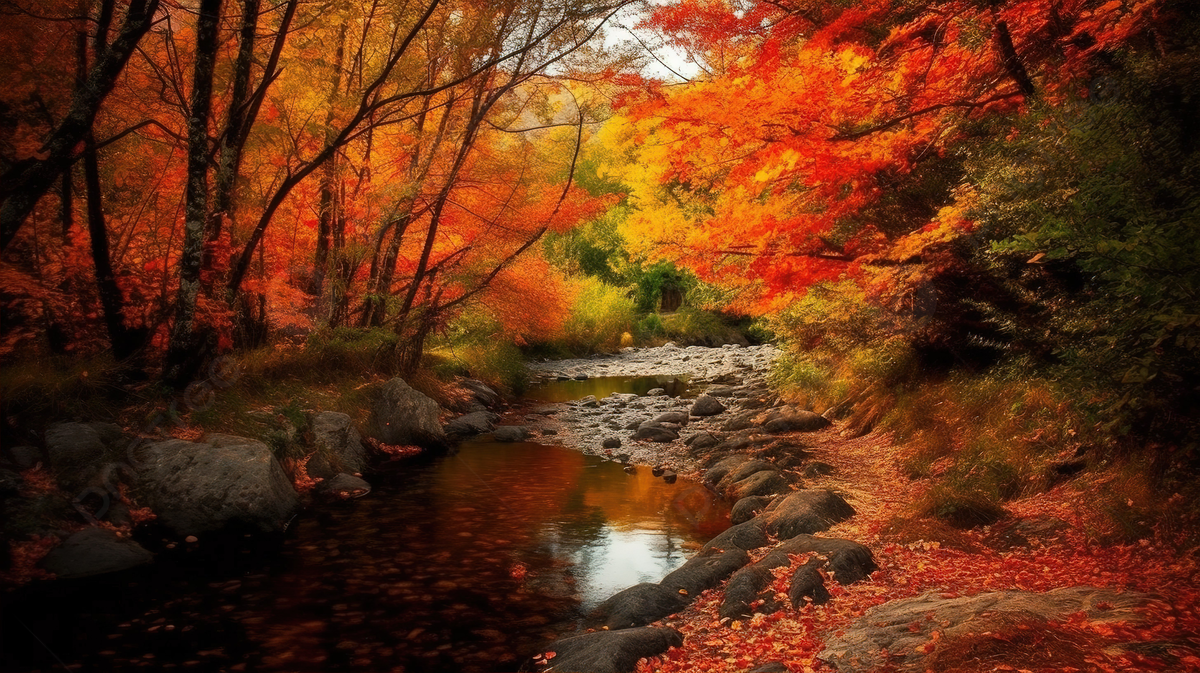

In [20]:
from IPython.display import Image, display # pip install -q ipython
image_path = 'images/autumn_tree.jpeg'
display(Image(image_path, width=300))

In [21]:
import base64
def encode_image(image_path):
    with open(image_path, 'rb') as image_file:
        image_binary_data = image_file.read()
        return base64.b64encode(image_binary_data).decode("utf-8")



In [22]:
base64_image = encode_image(image_path)
system_message = 'You are an experienced painter'
prompt = 'What are the color profiles used in this image?'

response = client.chat.completions.create(
    model='gpt-4o',
    messages = [
        {'role': 'system', 'content': system_message},
        {'role': 'user', 'content': [
            {'type': 'text', 'text': prompt},
            {'type': 'image_url', 'image_url': {
                'url': f'data:image/jpg;base64,{base64_image}'}
            }
        ]}
    ],
    temperature = 0.0
)

In [23]:
print(response.choices[0].message.content)

The image features a vibrant autumn scene with a warm color palette. The primary color profiles include:

1. **Reds and Oranges**: Dominant in the foliage, creating a warm and inviting atmosphere.
2. **Yellows**: Adding brightness and contrast, especially in the leaves.
3. **Greens**: Present in the background foliage, providing depth and variety.
4. **Browns and Earth Tones**: Found in the rocks and ground, grounding the scene.
5. **Blues and Grays**: Subtle hints in the water and shadows, adding balance.

These colors work together to create a rich, autumnal landscape.
